In [1]:
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D
from keras.optimizers import Adam

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_path = "./archive_2/fruits-360_dataset/fruits-360/Training"

myList = os.listdir(train_path)
noOffClass = len(myList)

In [4]:
images = []
classNo = []

for i in myList:
    myImageList = os.listdir(train_path + "//" + str(i))
    
    for j in myImageList:
        currentImage = cv2.imread(train_path + "//" + str(i) + "//" + j)
        images.append(currentImage)
        classNo.append(i)

In [5]:
images = np.array(images)
classNo = np.array(classNo)

print("images",len(images),"etiket",len(classNo))

images 67692 etiket 67692


In [6]:
test_path = "./archive_2/fruits-360_dataset/fruits-360/Test"

myListT = os.listdir(test_path)
noOffClassT = len(myListT)
print(noOffClassT)

131


In [7]:
imagesT = []
classNoT = []

for iT in myListT:
    myImageListT = os.listdir(test_path + "//" + str(iT))
    
    for jT in myImageListT:
        currentImageT = cv2.imread(train_path + "//" + str(iT) + "//" + jT)
        imagesT.append(currentImageT)
        classNoT.append(iT)

In [8]:
imagesT = np.array(imagesT)
classNoT = np.array(classNoT)

print("images",len(imagesT),"etiket",len(classNoT))

images 22688 etiket 22688


In [9]:
X_train,X_test,y_train,y_test = train_test_split(images,classNo,train_size=0.5,random_state=42)

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size=0.3,random_state=42)

In [10]:
print("Full Images",images.shape)
print("Train",X_train.shape,y_train.shape)
print("Test",X_test.shape,y_test.shape)
print("Val",X_val.shape,y_val.shape)

Full Images (67692, 100, 100, 3)
Train (10153, 100, 100, 3) (10153,)
Test (33846, 100, 100, 3) (33846,)
Val (23693, 100, 100, 3) (23693,)


Text(0.5, 1.0, 'y_val == (23693,)')

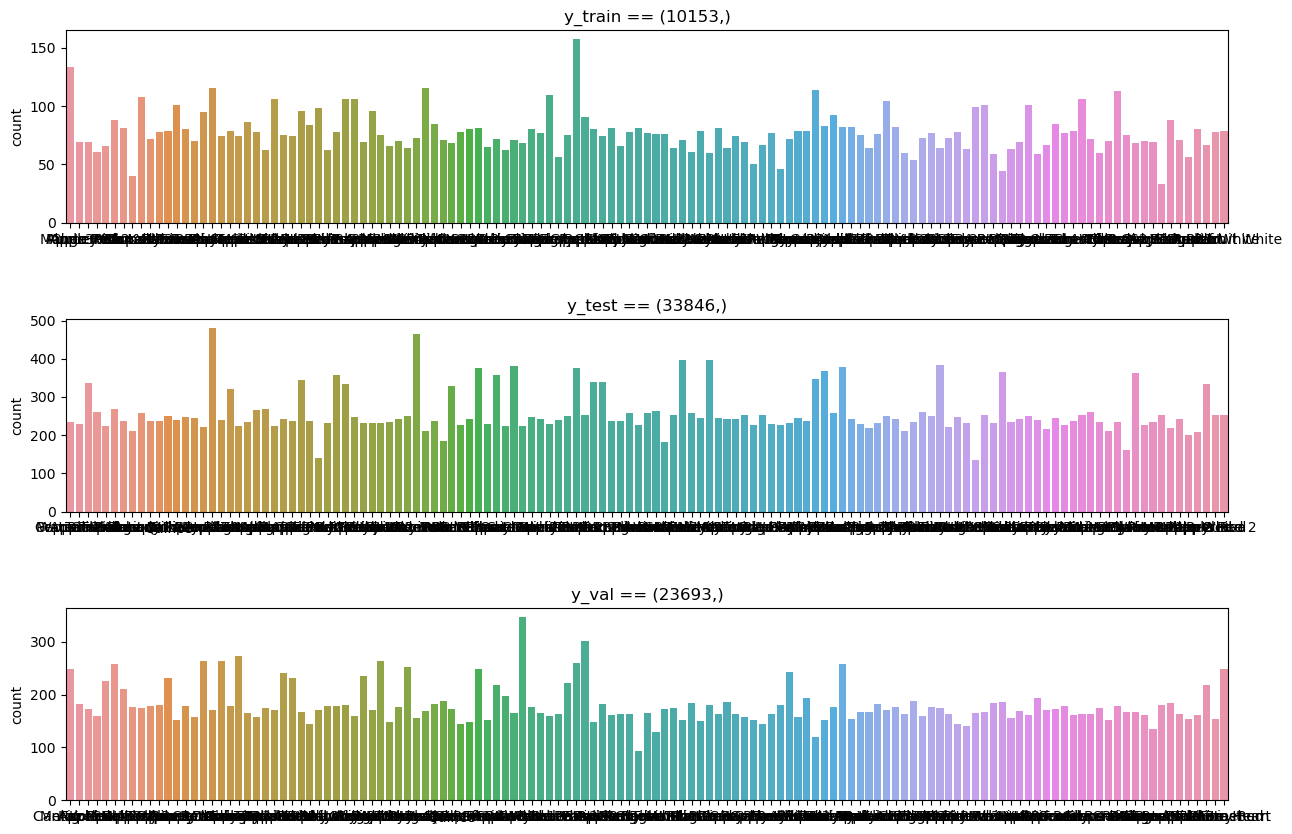

In [11]:
fig,axes = plt.subplots(3,1,figsize=(15,10))
fig.subplots_adjust(hspace=0.5) # => Grafikler arası boşluk bırakmak için

sns.countplot(y_train,ax=axes[0])
axes[0].set_title("y_train == {}".format(y_train.shape))

sns.countplot(y_test,ax=axes[1])
axes[1].set_title("y_test == {}".format(y_test.shape))

sns.countplot(y_val,ax=axes[2])
axes[2].set_title("y_val == {}".format(y_val.shape))

In [12]:
def grayScale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    
    return img

def preProcess(img):
    img = grayScale(img)
    img = equalize(img)
    img = img / 255
    
    return img

In [13]:
X_train = np.array(list(map(preProcess,X_train)))
X_val = np.array(list(map(preProcess,X_val)))
X_test = np.array(list(map(preProcess,X_test)))

In [14]:
x_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
x_val = X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2],1)
x_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(10153, 100, 100, 1)
(23693, 100, 100, 1)
(33846, 100, 100, 1)


In [15]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)

datagen.fit(x_train)

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [17]:
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
y_test = pd.DataFrame(y_test)

In [18]:
y_train = ohe.fit_transform(y_train)
y_test = ohe.fit_transform(y_test)
y_val = ohe.fit_transform(y_val)

In [19]:
print("Y_train",y_train.shape)
print("Y_test",y_test.shape)
print("Y_val",y_val.shape)

Y_train (10153, 131)
Y_test (33846, 131)
Y_val (23693, 131)


In [20]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(5,5),input_shape=(100,100,1),activation="relu",padding="same"))

model.add(Conv2D(64,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(noOffClass,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics = ["accuracy"])

In [23]:
x_train.shape[0]

10153

In [24]:
hist = model.fit_generator(datagen.flow(x_train,y_train,batch_size=35),
                           steps_per_epoch=x_train.shape[0] // 35,
                           epochs=25,
                           validation_data=(x_val,y_val),
                          shuffle=1)

Epoch 1/25
290/290 [==============================] - 319s 1s/step - loss: 3.9765 - accuracy: 0.0896 - val_loss: 2.5446 - val_accuracy: 0.3213
Epoch 2/25
290/290 [==============================] - 342s 1s/step - loss: 2.7894 - accuracy: 0.2547 - val_loss: 1.7448 - val_accuracy: 0.5010
Epoch 3/25
290/290 [==============================] - 381s 1s/step - loss: 2.2517 - accuracy: 0.3645 - val_loss: 1.3474 - val_accuracy: 0.6032
Epoch 4/25
290/290 [==============================] - 373s 1s/step - loss: 1.8925 - accuracy: 0.4520 - val_loss: 0.9971 - val_accuracy: 0.6982
Epoch 5/25
290/290 [==============================] - 352s 1s/step - loss: 1.6169 - accuracy: 0.5194 - val_loss: 0.9547 - val_accuracy: 0.7136
Epoch 6/25
290/290 [==============================] - 335s 1s/step - loss: 1.3881 - accuracy: 0.5769 - val_loss: 0.8447 - val_accuracy: 0.7434
Epoch 7/25
290/290 [==============================] - 373s 1s/step - loss: 1.2431 - accuracy: 0.6165 - val_loss: 0.5092 - val_accuracy: 0.8570

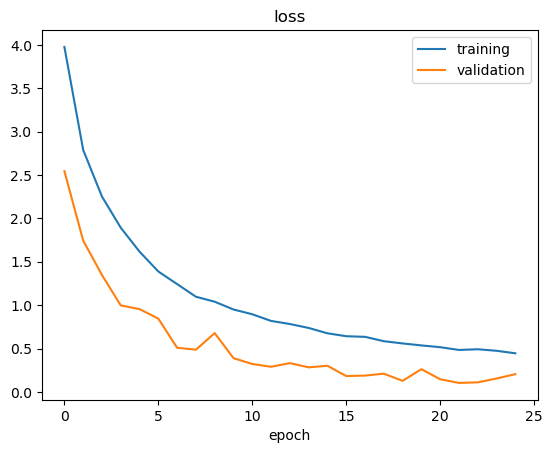

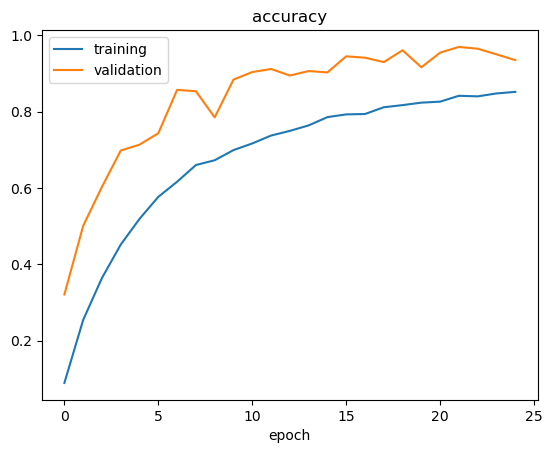

In [25]:
plt.figure(1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

In [26]:
score = model.evaluate(x_test,y_test,verbose=0)
print("Test Score: ",score[0])
print("Test Accuracy: ",score[1])

Test Score:  0.204093337059021
Test Accuracy:  0.9366247057914734


In [32]:
model.save("model.h5")